In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



%matplotlib notebook

from IPython.display import display

from ipywidgets import HBox, VBox, IntSlider, Play, jslink

import time

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

In [14]:
def plot_system(r, x0, n):
    fig, ax = plt.subplots(1, 1, figsize=(6, 8),
                               sharey=True)
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1, n)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    
    # Initialisation 
    x = x0
    
    for i in range(n):
        
        y = logistic(r, x)
        
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'r', lw=1)
        ax.plot([x, y], [y, y], 'r', lw=1)
        
        # Plot the positions 
        ax.plot([x], [y], 'ok', ms=5)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

r_slide = widgets.FloatSlider(value = 0, min = 0, max = 4, step = 0.01, description = 'r evolution')
    
w = interactive(plot_system,{'manual' : True}, r=r_slide, x0=fixed(0.2), n=fixed(100), continuous_update=True )
display(w)


interactive(children=(FloatSlider(value=0.0, description='r evolution', max=4.0, step=0.01), Button(descriptio…

<IPython.core.display.Javascript object>


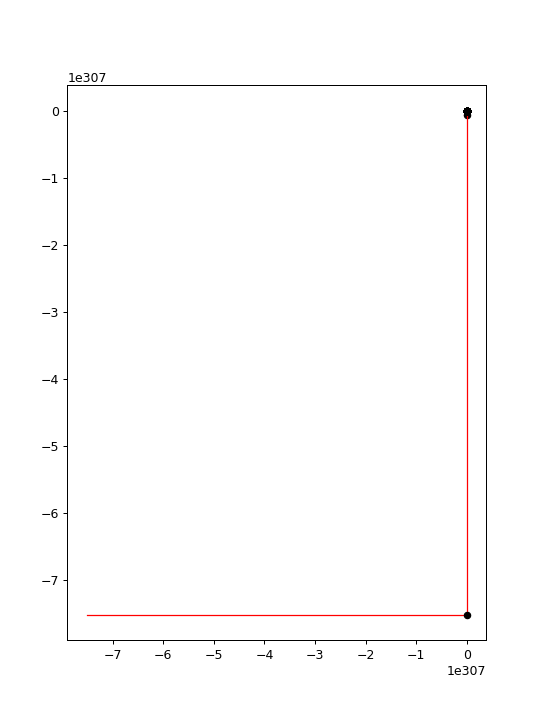

In [9]:
%matplotlib notebook

fig, ax = plt.subplots(1, 1, figsize=(6, 8),
                               sharey=True)
line, = ax.plot([], [], lw=1)

def init():
    # Plot the function and the
    # y=x diagonal line.
    line.set_data([], [])
    ax.plot([0, 1], [0, 1], 'k', lw=1)
    return line,
    
def animate(r, x=0.1, n=20):
    
    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    
    for i in range(n):
        
        y = logistic(r, x)
        
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'r', lw=1)
        ax.plot([x, y], [y, y], 'r', lw=1)
        
        # Plot the positions 
        ax.plot([x], [y], 'ok', ms=5)
        line.set_data([x],[y])
        x=y
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=200, blit=False)

In [10]:
widgets.FloatSlider?